In [1]:
import pandas as pd

C:\Users\johna\AppData\Local\Temp\ipykernel_17672\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv('housing.data', header=None, sep='\s+')
#Los datos estan mal acomodados por default, entonces tenemos que darle un header y separar los datos por espacios

data.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


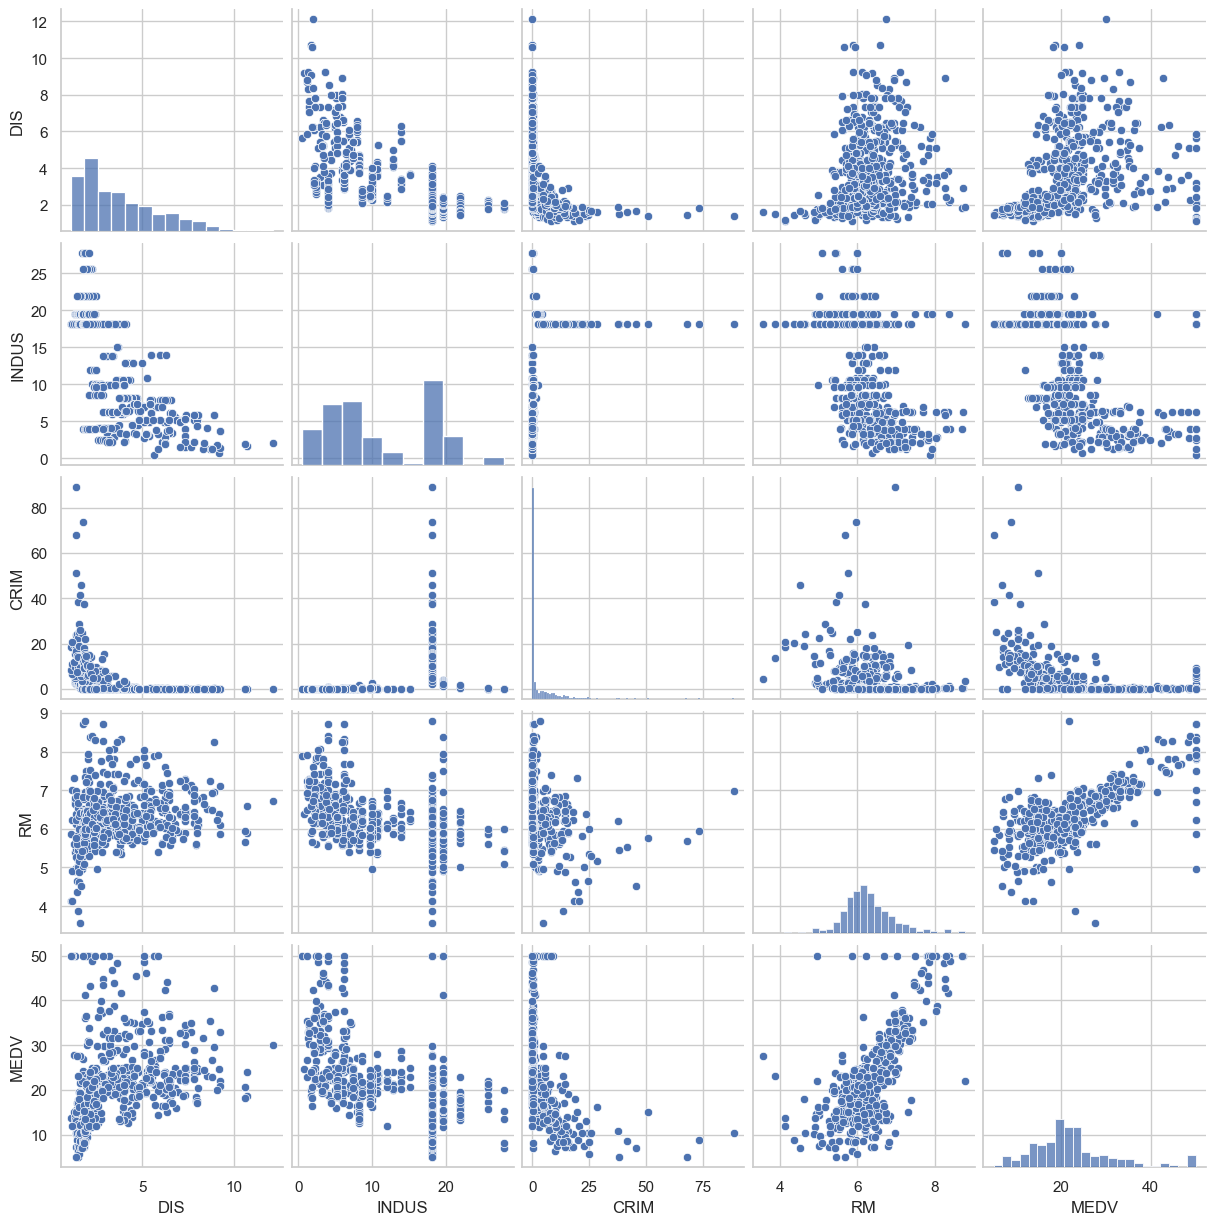

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt 
sns.set(style='whitegrid', context='notebook')
cols = ['DIS', 'INDUS', 'CRIM', 'RM', 'MEDV']

sns.pairplot(data[cols], height=2.5)
plt.show()

Lo siguiente es calcular las correlaciones entre las variables, podemos usar un heat map para esto, sin embargo necesitamos numpy para calcular las correlaciones.

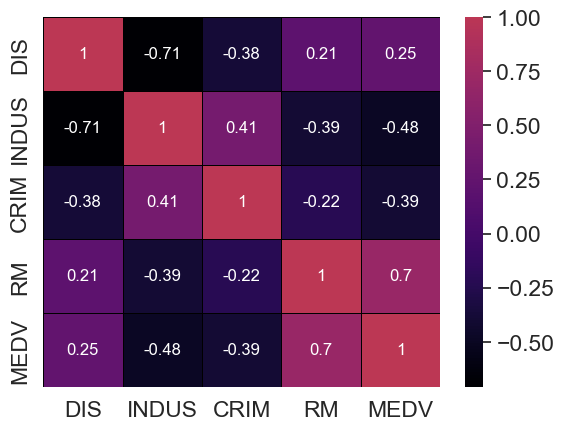

In [4]:
import numpy as np

#ESTA ES UNA FORMA CON NUMPY
#cm = np.corrcoef(data[cols].values.T) #aqui calculamos la correlacion de las columnas


#ESTA FORMA ES MAS CONCISA Y SIN IMPORTAR NUMPY
cm = data[cols].corr() 

#estlizamos un poquito para que se logre ver bien

sns.set(font_scale=1.5)

sns.heatmap(
    cm,
    annot=True,
    cmap='inferno',
    center=1,
    linewidths=0.5,
    linecolor='black',
    yticklabels=cols,
    xticklabels=cols,
    annot_kws={"size":12},
    cbar=True
)

plt.show()


Recordemos que entre mas alto el valor, mas correlacionado esta, osea esta mejor

### Es hora de hacer la extrapolacion(prediccion) de la media. Usaremos el valor de RM como variable independiente.

In [5]:
from sklearn import linear_model

#Aqui se crea un "creador de modelos" para hacer la regresion aun sin pasarle los datos.
regresion = linear_model.LinearRegression()

rm = data["RM"].values.reshape((-1,1))

modelo = regresion.fit(rm, data["MEDV"])

print("Intercepcion (b)", modelo.intercept_)
print("Pendiente (m)", modelo.coef_)

Intercepcion (b) -34.670620776438554
Pendiente (m) [9.10210898]


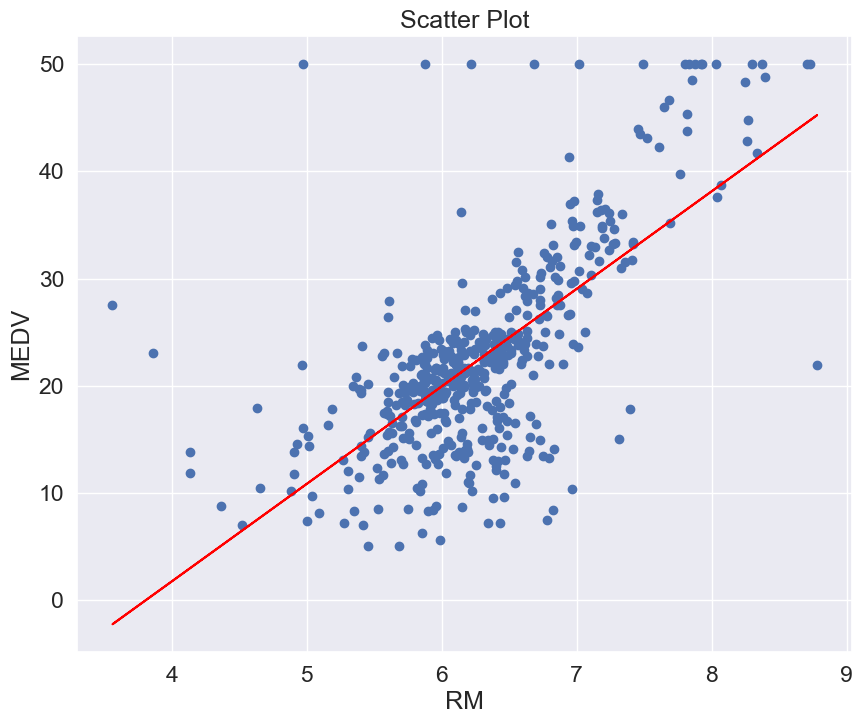

In [11]:
plt.figure(figsize=(10,8))
plt.scatter(rm, data["MEDV"])
plt.plot(rm, modelo.predict(rm), color="red")
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.title("Scatter Plot")
plt.show()

In [16]:
num_habitaciones = [[5]]

print(f"El precio de una casa de {num_habitaciones[0][0]} habitaciones en Boston es de ", modelo.predict(num_habitaciones))

El precio de una casa de 5 habitaciones en Boston es de  [10.83992413]
